# Lab 2: Digit Recognition with LogReg/RF/GBT
### Univ.AI 
### ML-2 Cohort-1


In [1]:
#Import libraries
import time
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from collections import OrderedDict
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

## Load the data

In [2]:
dataset = datasets.load_digits()

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
X_train = X_train/255.0
X_test = X_test/255.0

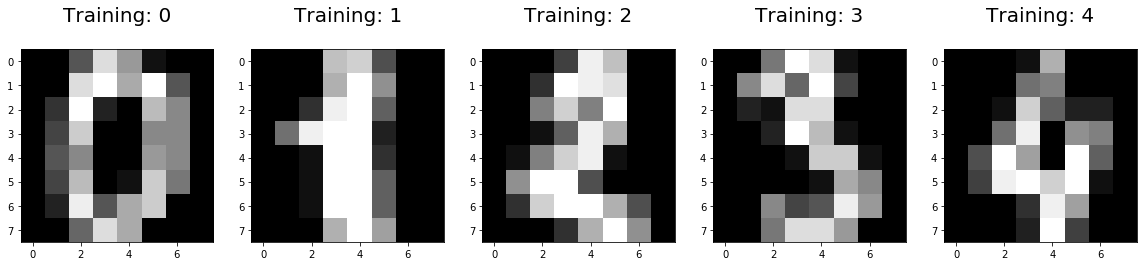

In [3]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(dataset.data[0:5], dataset.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

## Modelling

In [4]:
#Define a function to plot confusion matrix 
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    plt.ylabel('true label')
    plt.xlabel('predicted label')

### Logistic Regression

In [10]:
c_values = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

#Hyper parameter tuning for Logistic regression
#your code here 
lr = LogisticRegression()
gs = GridSearchCV(lr, param_grid = c_values)
gs.fit(X_train, y_train)
y_pred_train = gs.predict(X_train)
y_pred_test = gs.predict(X_test)

#Finding the best value of C using GridSearchCV
#your code here 
best_c = gs.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

In [7]:
#Print accuracy score of test data

#your code here 

acc = accuracy_score(y_test, y_pred_test)
print(acc)

0.9611111111111111


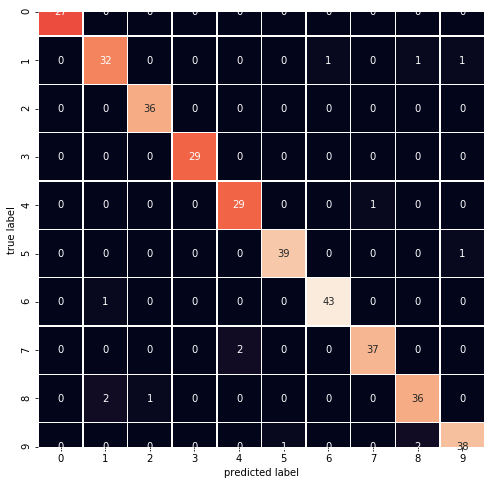

In [8]:
#Plot confusion matrix of test data
plot_confusion_matrix(y_test, y_pred_test)

### Random Forest

In [13]:
#Create 2 models with same max_depth and different min_samples_leaf
ensemble_clfs = [(1,RandomForestClassifier(warm_start=True, min_samples_leaf=1,oob_score=True,max_depth = 10,random_state=420)),
                (5,RandomForestClassifier(warm_start=True, min_samples_leaf=5,oob_score=True,max_depth = 10,random_state=420))]

# Map a label (the value of `min_samples_leaf`) to a list of (model, oob error) tuples.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 80
max_estimators = 500

#Create models for all n_estimators

#your code here 
for label, model in ensemble_clfs:
    for i in range(min_estimators, max_estimators+1):
        clf = model
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

         # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

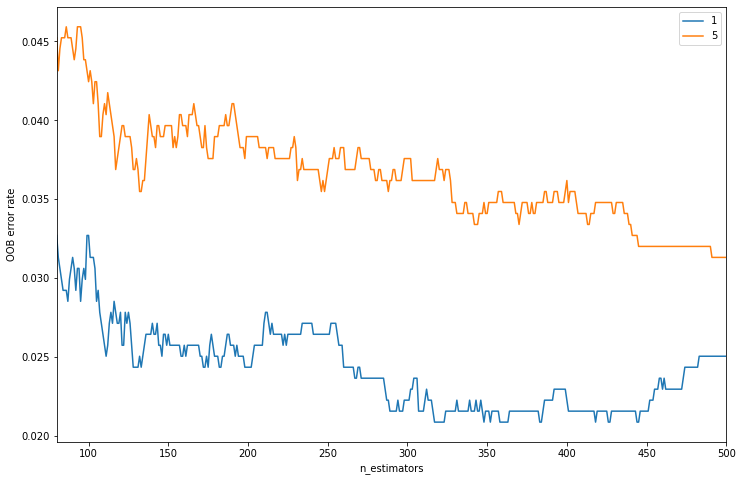

In [16]:

#Plot the OOB score vs n_estimators for different min_samples_leaf

#your code here 
fig, ax = plt.subplots(figsize=(12, 8))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    ax.plot(xs, ys, label=label)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [31]:
min = error_rate[1][0][1]
best_num_estimators = error_rate[1][0][0]
print(min)
print(best_num_estimators)

for i in error_rate[1]:

  if i[1]<min:
    min = i[1]
    best_num_estimators = i[0]

print("Min: ",min)
print("Est: ",best_num_estimators)

0.032707028531663185
80
Min:  0.02087682672233826
Est:  317


In [33]:
#Find the best model by finding the lowest oob score and print out the min_samples_leaf and n_estimators for that model

#your code here 

best_leaf = 1 #by graph
print(f'Optimum num of estimators: {best_num_estimators} \nmin_samples_leaf: {best_leaf}')

Optimum num of estimators: 317 
min_samples_leaf: 1


In [34]:
#Build the best model taking the above best parameters

#your code here 
clf = RandomForestClassifier(warm_start=True, min_samples_leaf= best_leaf,oob_score=True,max_depth = 10,random_state=420, n_estimators = best_num_estimators)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [36]:
#Print accuracy score of test data
#your code here 
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.9777777777777777

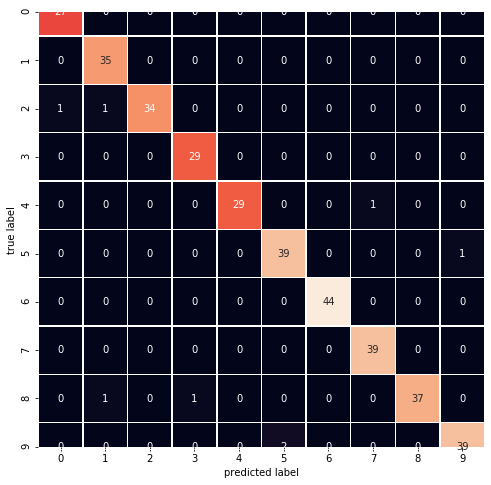

In [37]:
#Plot confusion matrix of test data
plot_confusion_matrix(y_test, y_pred)

### Gradient Boosting

In [39]:
n_estimators = 500
# We specify that if the scores don't improve by atleast 0.01 for the last 5 stages, stop fitting additional stages


#your code here
gb = GradientBoostingClassifier(n_estimators=500, max_depth=5, validation_fraction = 0.3, n_iter_no_change = 5)
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=5, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.3, verbose=0,
                           warm_start=False)

In [40]:
#Predicting on the test data and calculating the accuracy score

#your code here
gb_pred = gb.predict(X_test)

#Print accuracy score of test data
#your code here
gb_acc = accuracy_score(y_test, gb_pred)
print(gb_acc)

0.9222222222222223


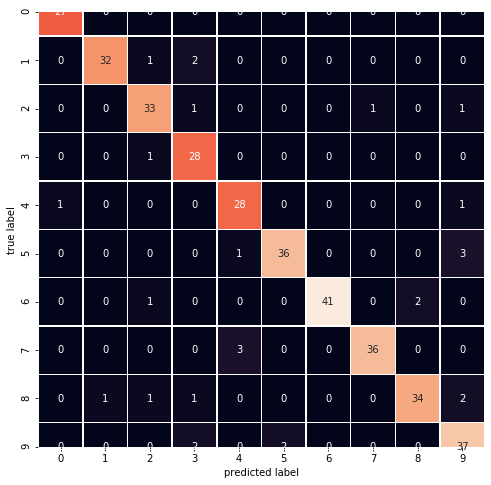

In [41]:
#Plot confusion matrix of test data
plot_confusion_matrix(y_test, gb_pred)

#### **Optional**

In [ ]:
#Create a model with early stopping



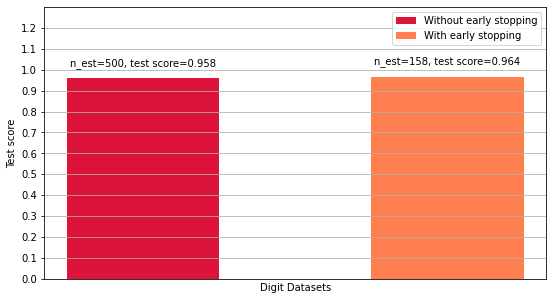

In [ ]:
#Plot the test score for the gradient boosting model with and without early stopping
#your code here

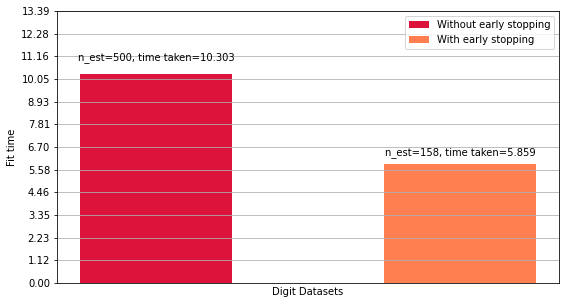

In [ ]:
#Plot the test score for the gradient boosting model with and without early stopping
#your code here

Which model did the best?